### To predict the default payment of the credit card client, wheather the client will pay the credit card amount right next month or not.

#### import all the libraries required.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
%matplotlib inline

regressor = LogisticRegression()
scalar = MinMaxScaler()

In [17]:
data_set = pd.read_excel("default of credit card clients.xls",header = 1)

In [18]:
data_set

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


#### Removing the 'default payment next month' which is suppose to be the target, 'ID' which is just nothing but the serial number.

In [19]:
data =  data_set.drop(['default payment next month','ID'], axis = 1)

#### Take the 'default payment next month' as the target

In [20]:
target = data_set['default payment next month']

#### taking the spearman correlation method.

In [21]:
correlation = data_set.corr('spearman')

In [22]:
correlation

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,1.000000,0.030636,0.018497,0.033318,-0.028316,0.024727,-0.025029,-0.004919,-0.009176,-0.004307,...,0.032995,0.015142,0.019961,0.011925,0.050900,0.093546,0.021932,0.012320,0.037875,-0.013952
LIMIT_BAL,0.030636,1.000000,0.056995,-0.263575,-0.113535,0.186485,-0.296461,-0.342596,-0.331615,-0.308658,...,0.072894,0.080694,0.088094,0.272367,0.278401,0.284468,0.283411,0.293749,0.317459,-0.169586
SEX,0.018497,0.056995,1.000000,0.015616,-0.031535,-0.091697,-0.053356,-0.072143,-0.067361,-0.060257,...,-0.023057,-0.015097,-0.010868,-0.003834,0.008007,0.020450,0.013536,0.014731,0.033591,-0.039961
EDUCATION,0.033318,-0.263575,0.015616,1.000000,-0.162415,0.158731,0.132288,0.168715,0.162047,0.151878,...,0.069018,0.060286,0.055977,-0.041727,-0.046651,-0.042048,-0.043324,-0.049463,-0.053060,0.044369
MARRIAGE,-0.028316,-0.113535,-0.031535,-0.162415,1.000000,-0.462810,0.023312,0.036950,0.041867,0.044805,...,0.005736,0.003680,0.004795,-0.003407,-0.015065,-0.012432,-0.015854,-0.012817,-0.014808,-0.026490
AGE,0.024727,0.186485,-0.091697,0.158731,-0.462810,1.000000,-0.063733,-0.083271,-0.083192,-0.080190,...,-0.003330,-0.000342,0.000217,0.033580,0.044192,0.033356,0.040529,0.038125,0.038977,0.005149
PAY_0,-0.025029,-0.296461,-0.053356,0.132288,0.023312,-0.063733,1.000000,0.627170,0.548112,0.516156,...,0.306818,0.298782,0.289055,-0.098315,-0.063549,-0.054153,-0.034312,-0.026223,-0.045015,0.292213
PAY_2,-0.004919,-0.342596,-0.072143,0.168715,0.036950,-0.083271,0.627170,1.000000,0.799388,0.713212,...,0.497540,0.478029,0.459427,0.020401,0.083520,0.087311,0.095036,0.099155,0.082265,0.216919
PAY_3,-0.009176,-0.331615,-0.067361,0.162047,0.041867,-0.083192,0.548112,0.799388,1.000000,0.801047,...,0.531436,0.507209,0.484530,0.215548,0.037020,0.103370,0.118790,0.124204,0.098356,0.194771
PAY_4,-0.004307,-0.308658,-0.060257,0.151878,0.044805,-0.080190,0.516156,0.713212,0.801047,1.000000,...,0.592718,0.561290,0.533639,0.185478,0.246221,0.069251,0.144446,0.161743,0.142570,0.173690


In [126]:
abs(correlation['default payment next month']).sort_values()

BILL_AMT6                     0.000076
AGE                           0.005149
BILL_AMT5                     0.006851
BILL_AMT4                     0.008357
BILL_AMT3                     0.012670
ID                            0.013952
BILL_AMT2                     0.015554
BILL_AMT1                     0.025327
MARRIAGE                      0.026490
SEX                           0.039961
EDUCATION                     0.044369
PAY_AMT5                      0.116587
PAY_AMT6                      0.121444
PAY_AMT4                      0.127979
PAY_AMT3                      0.139388
PAY_6                         0.142523
PAY_AMT2                      0.150977
PAY_5                         0.159043
PAY_AMT1                      0.160493
LIMIT_BAL                     0.169586
PAY_4                         0.173690
PAY_3                         0.194771
PAY_2                         0.216919
PAY_0                         0.292213
default payment next month    1.000000
Name: default payment nex

#### From the above order we get to know that the four most impacting features are 'PAY_0', 'PAY_2', 'PAY_3','PAY_4'

###### 'PAY_0' indicates he repayment status in September 2005 

###### 'PAY_2' the repayment status in August, 2005 

###### 'PAY_3' the repayment status in october, 2005

###### 'PAY_4' the repayment status in november, 2005

###### The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months

In [88]:
x = np.array(data[['PAY_0']])

y = np.array(target)

x = scalar.fit_transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3)

regressor.fit(xtrain,ytrain)

ypred = regressor.predict(xtest)

print(accuracy_score(ypred,ytest))

0.8164444444444444


C:\Users\Vivek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


#### By taking into consideration only "PAY_0"  above.

WE GET SO MUCH ACCURACY.

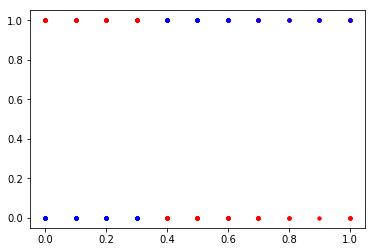

In [89]:
plt.plot( xtrain,ytrain,'r.',xtest,ypred,'b.',)

But when we plot the 'PAY_0' against the target we get the graph somewhat like about
here we the signmoid curve has fit many points but lot of points are miss classified 

lets take another feature.

In [90]:
x = np.array(data[['PAY_2']])

y = np.array(target)

x = scalar.fit_transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3)

regressor.fit(xtrain,ytrain)

ypred = regressor.predict(xtest)

print(accuracy_score(ypred,ytest))

0.7835555555555556


By considering the "PAY_2" feature we got so much of accuracy.


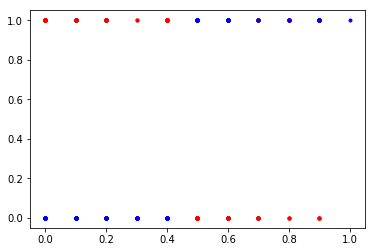

In [91]:
plt.plot( xtrain,ytrain,'r.',xtest,ypred,'b.',)

but when we polt the graph, many another points are missclassified.

lets try taking another feature

In [113]:
x = np.array(data[['PAY_3']])

y = np.array(target)

x = scalar.fit_transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3)

regressor.fit(xtrain,ytrain)

ypred = regressor.predict(xtest)

print(accuracy_score(ypred,ytest))

0.7846666666666666


By considering only "PAY_3" feature we will get so much accuracy

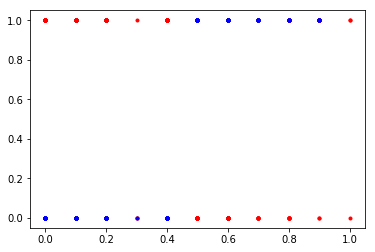

In [114]:
plt.plot( xtrain,ytrain,'r.',xtest,ypred,'b.',)

when we plot the graph many points are miss classified 

lets try taking another feature.

In [133]:
x = np.array(data[['PAY_4']])

y = np.array(target)

x = scalar.fit_transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3)

regressor.fit(xtrain,ytrain)

ypred = regressor.predict(xtest)

print(accuracy_score(ypred,ytest))

0.7863333333333333


By only considering only 'PAY_4' feature we get the accuracy as above.

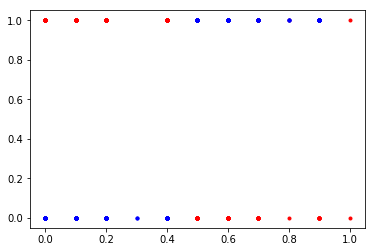

In [120]:
plt.plot( xtrain,ytrain,'r.',xtest,ypred,'b.',)

when we plot the graph we will get something like that.

many points are missclassified.

lets try taking all the features 

In [124]:
x = np.array(data[['PAY_0','PAY_2','PAY_3','PAY_4']])

y = np.array(target)

x = scalar.fit_transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3)

regressor.fit(xtrain,ytrain)

ypred = regressor.predict(xtest)

print(accuracy_score(ypred,ytest))

0.8112222222222222


When we consider all the 4 featuers we get a better accuracy.

Hence this prediction is not biased or in favor of one feature.

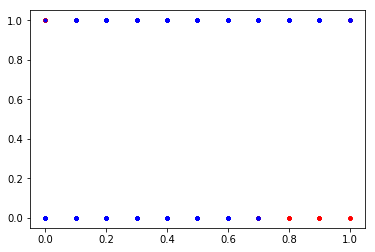

In [125]:
plt.plot( xtrain,ytrain,'r.',xtest,ypred,'b.',)

By ploting the graph we  get to know that many points are considered for the prediction.

only few other points are missclassified.